# Features in OLED devices

To fabricate OLED devices, there are various materials that are being used. Different materials are used for hole transporting layer(HTL), hole injection layer(HIL), buffer layer, electron transport layer(ETL), emissive layer(EML) and few others. There are many combination of the material and several architecture used in fabricating these devices. For this model, I am focusing on the materials for BLUE OLED.


Now, let's take a look at the features used for our regression model. 
Every material has a distinct property. However each material has their own energy level, the lowest unoccupied molecular orbital(LUMO) and highest occupied molecular orbital(HOMO) that can be measured. Another parameter that can be changed is the thickness of each layer. So, these three features are going to be considered for our model.  

Let's import some dependencies first.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
# change directory to excel file and read excel file
os.chdir('C:/Anaconda3/projects/oled')
df = pd.read_excel('oled.xlsx', sheetname='Sheet3')
#fill the missing data
df = df.fillna(value=0)
X = df[list(df.columns)[:-5]]
X.head()

,lumo_1,homo_1,t1,lumo_2,homo_2,t2,lumo_3,homo_3,t3,LUMO,HOMO,t4,lumo5,homo5,t5,lumo6,homo6,t6,wf_1,t7
0,3.3,5.2,60,2.0,5.8,20.0,2.4,5.9,10.0,1.09,5.34,25.0,2.5,6.8,5.0,2.80,6.20,30.0,3.5,1.5
1,5.7,9.5,10,2.0,5.8,40.0,0.0,0.0,0.0,2.02,5.56,20.0,0.0,0.0,0.0,2.73,6.68,45.0,4.3,2.0
2,2.3,5.3,10,2.0,5.6,70.0,0.0,0.0,0.0,2.40,5.90,20.0,0.0,0.0,0.0,2.73,6.68,45.0,3.5,1.0
3,3.3,5.2,40,0.0,0.0,0.0,0.0,0.0,0.0,2.70,5.71,50.0,0.0,0.0,0.0,0.00,0.00,0.0,4.2,1.0
4,3.3,5.2,50,2.7,5.8,5.0,0.0,0.0,0.0,2.02,5.35,30.0,0.0,0.0,0.0,2.80,6.20,30.0,3.5,1.0


There is a lot of missing data since devices have different number of layers. Some devices use 2 different layers for charge transport (HTL and ETL) and some devices don't even have some of the layers. Therefore, there are lots of zeros in the dataframe.


In [3]:
# let's look at y
Y = df['cd/a']
Y.head()

0    28.24
1    40.80
2    26.30
3     3.38
4     1.00
Name: cd/a, dtype: float64

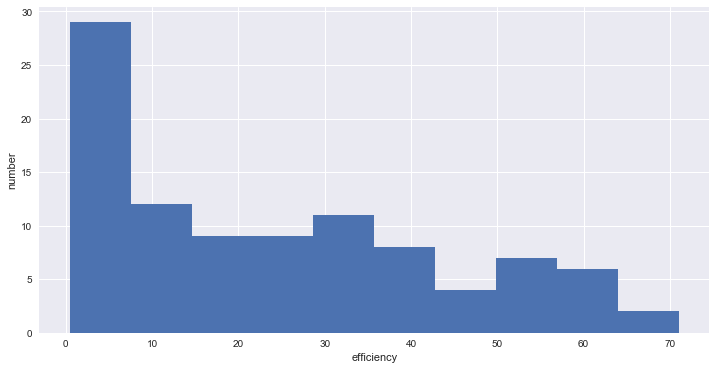

In [4]:
# device efficiency distribution
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.ylabel('number')
plt.xlabel('efficiency')
Y.hist()

From the above graph, we can observe that most of our data has efficiency less than 10 Cd/A and the distribution is not normal distribution. It is skewed to the left.

Let's take a look at the distribution of the features as well. They are denoted by X below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002643887DBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002643A42BC18>]], dtype=object)

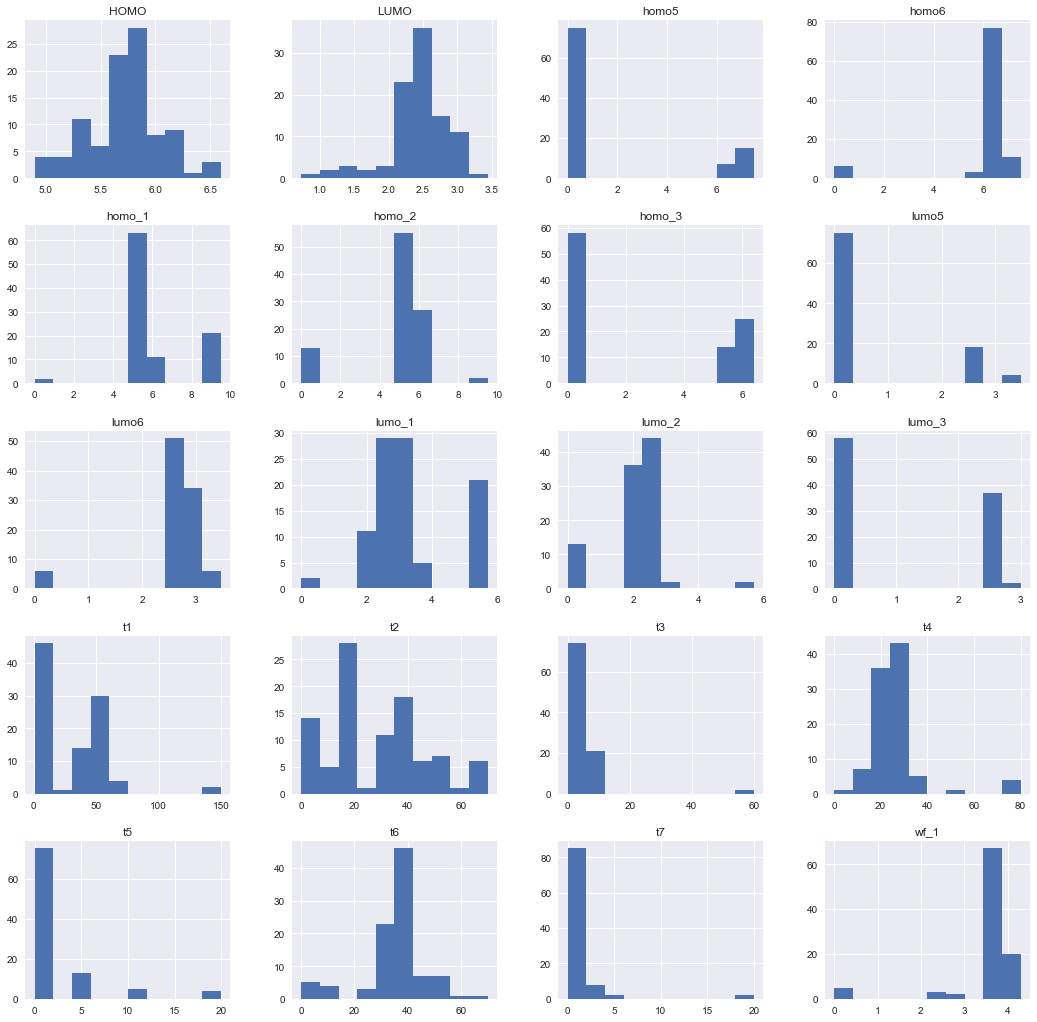

In [5]:
X = df[list(df.columns)[:-5]]
plt.rcParams['figure.figsize'] = (18.0, 18.0)
X.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002643B15CD68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002643B5FA898>]], dtype=object)

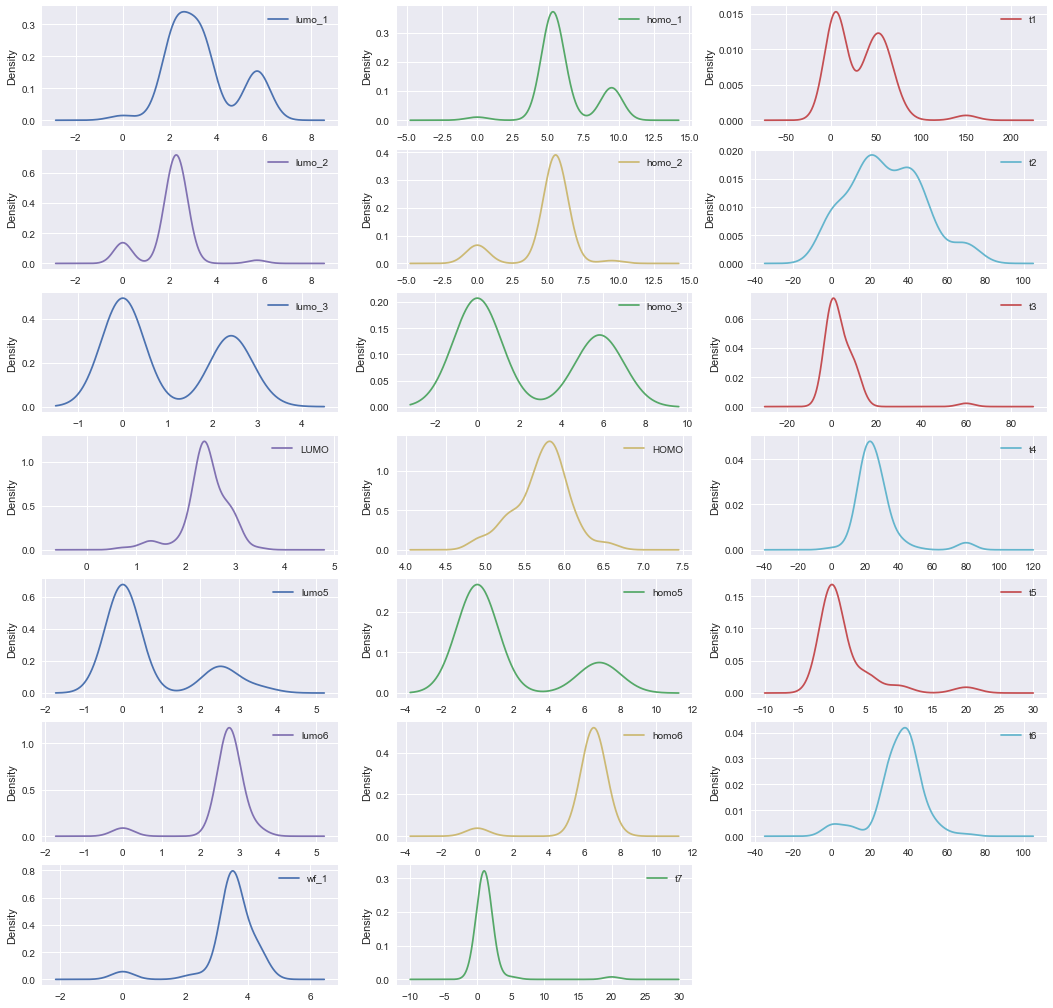

In [6]:
# we can also see the density of the distribution plot
X.plot(kind='density', subplots=True, layout=(7,3), sharex=False)

Based on the data, we can observe how the features correlate with efficiency.

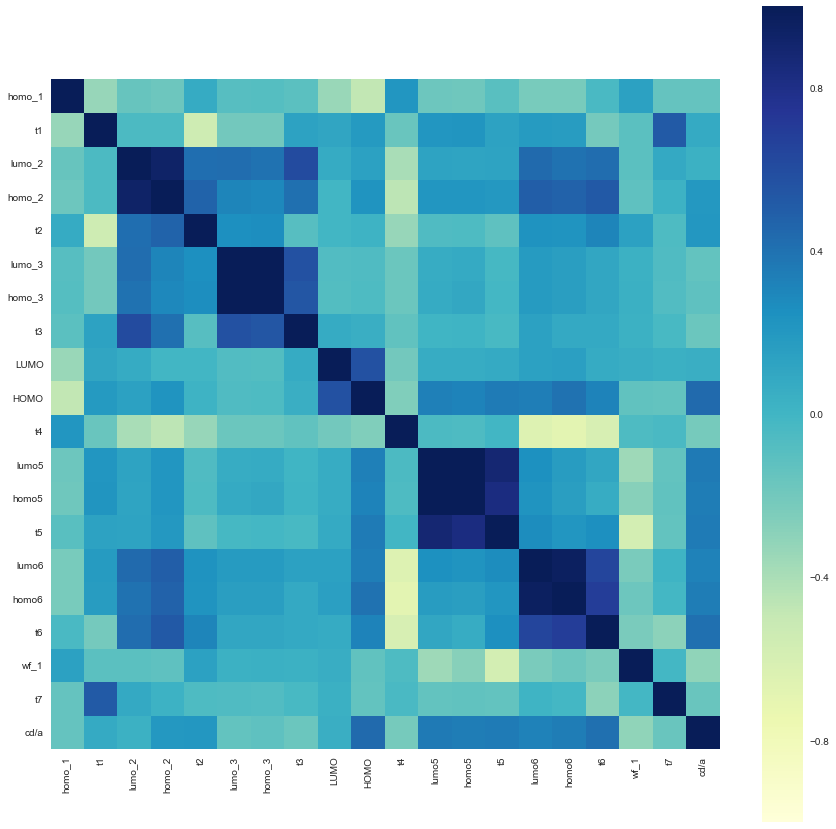

List the features in descending order of their correlation with cd/a:

HOMO:   0.4408692105992884
t6:   0.40809119905406305
lumo5:   0.3666302084174213
t5:   0.35402587102818484
homo5:   0.3463183737021076
homo6:   0.3450656376832737
lumo6:   0.3280784950475893
wf_1:   -0.30924188698221033
t4:   -0.21584415155124356
t2:   0.20687491172957756
homo_2:   0.19637568837948313
t3:   -0.1697594110325318
t7:   -0.1601700187710503
homo_1:   -0.14641736092863514
lumo_3:   -0.13452916383342545
homo_3:   -0.11963717904448168
t1:   0.08137884928486246
LUMO:   0.049336959451351914
lumo_2:   0.03754602755567048


In [7]:
# See correlation of features with each other and with efficiency
X = df[list(df.columns)[:-5] + ['cd/a']]
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

cor_dict = corr['cd/a'].to_dict()
del cor_dict['cd/a']
print("List the features in descending order of their correlation with cd/a:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

We can see that HOMO level and thickness of layer 6 (t6, thickness of ETL) correlate the most with the efficiency. On the other hand, LUMO and lumo_2 correlate the least.